# либы

In [3]:
!pip install pymorphy2 pymystem3

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 48.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e94454d03c94aad1815fdeba2ca2304893c8e9028d63605a6e4f4f7443f460b1
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [5]:
!pip install nltk

In [4]:
!pip install emoji textblob symspellpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 2.1 MB/s eta 0:00:00


In [6]:
!pip install transformers torch sentence-transformers keybert

In [7]:
!pip install umap-learn hdbscan emoji symspellpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


In [8]:
import re
import emoji
import pymorphy2
from nltk.tokenize import word_tokenize
import nltk
from typing import List, Set, Tuple, Dict
from pymystem3 import Mystem
from textblob import TextBlob
from symspellpy import SymSpell
from sklearn.preprocessing import StandardScaler
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
from keybert import KeyBERT
import umap
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from collections import Counter
import csv
import random
from transformers import pipeline, BertTokenizer, BertForSequenceClassification

In [7]:
def print_version(package_name):
    try:
        package = __import__(package_name)
        print(f"{package_name}: {package.__version__}")
    except ImportError:
        print(f"{package_name} не установлен.")

packages = [
    "emoji",
    "pymorphy2",
    "nltk",
    "pymystem3",
    "textblob",
    "symspellpy",
    "sklearn",
    "gensim",
    "transformers",
    "sentence_transformers",
    "keybert",
    "umap",
    "HDBSCAN",
    "matplotlib",
    "pandas",
    "numpy",
    "wordcloud"
]
for package in packages:
    print_version(package)

emoji: 2.14.0
pymorphy2: 0.9.1
nltk: 3.9.1
pymystem3: 0.2.0
textblob: 0.17.1
symspellpy: 6.7.8
sklearn: 1.5.2
gensim: 4.3.3
transformers: 4.46.2
sentence_transformers: 3.2.1
keybert: 0.8.5
umap: 0.5.7
HDBSCAN не установлен.
matplotlib: 3.8.0
pandas: 2.2.2
numpy: 1.26.4
wordcloud: 1.9.4


# Генерация файла

In [75]:
#без отзывов
def generate_dataset(filename, num_rows=1000):

    headers = [
        "Пол", "Возраст", "Город", "Доход", "Любимый продукт",
        "Сумма покупки", "Частота покупок", "Семейное положение", "Есть дети",
        "Кредитный рейтинг", "Дата последней покупки", "Отмененные заказы",
        "Частота посещений магазина", "Количество жалоб", "Предпочитаемый способ доставки",
        "Операционная система"
    ]

    genders = ["Мужской", "Женский"]
    cities = [
        "Москва", "Санкт-Петербург", "Новосибирск", "Екатеринбург", "Казань", "Нижний Новгород",
        "Челябинск", "Самара", "Омск", "Ростов-на-Дону", "Уфа", "Красноярск", "Воронеж",
        "Пермь", "Волгоград", "Краснодар", "Тольятти", "Ижевск", "Ульяновск", "Барнаул",
        "Владивосток", "Ярославль", "Тюмень", "Иркутск", "Махачкала", "Хабаровск",
        "Оренбург", "Новокузнецк", "Кемерово", "Рязань", "Томск", "Астрахань",
        "Пенза", "Липецк", "Тула", "Киров", "Чебоксары", "Курск", "Брянск",
        "Иваново", "Магнитогорск", "Тверь", "Белгород", "Сочи", "Калининград",
        "Ставрополь", "Улан-Удэ", "Сургут", "Смоленск", "Владикавказ"
    ]
    favorite_products = [
        "Электроника", "Одежда", "Продукты", "Книги", "Мебель", "Игрушки",
        "Косметика", "Спортивные товары", "Бытовая техника", "Музыка",
        "Садовые принадлежности", "Автозапчасти", "Ювелирные изделия", "Товары для животных"
    ]
    marital_status = ["не замужем", "В браке"]
    delivery_methods = ["Доставка на дом", "Самовывоз", "Курьерская доставка"]
    operating_systems = ["Windows", "MacOS", "Android", "iOS", "Linux"]
    visit_frequencies = ["Ежедневно", "Еженедельно", "Ежемесячно", "Редко"]

    data = []
    for i in range(1, num_rows + 1):
        row = {
            "Пол": random.choice(genders),
            "Возраст": random.randint(15, 70),
            "Город": random.choice(cities),
            "Доход": round(random.uniform(20000, 150000), 2),
            "Любимый продукт": random.choice(favorite_products),
            "Сумма покупки": round(random.uniform(500, 150000), 2),
            "Частота покупок": random.randint(1, 20),
            "Семейное положение": random.choice(marital_status),
            "Есть дети": random.choice(["Да", "Нет"]),
            "Кредитный рейтинг": random.randint(300, 850),
            "Дата последней покупки": f"{random.randint(2020, 2024)}-{random.randint(1, 12):02d}-{random.randint(1, 28):02d}",
            "Отмененные заказы": random.randint(0, 10),
            "Частота посещений магазина": random.choice(visit_frequencies),
            "Количество жалоб": random.randint(0, 5),
            "Предпочитаемый способ доставки": random.choice(delivery_methods),
            "Операционная система": random.choice(operating_systems),
        }
        data.append(row)

    with open(filename, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()
        writer.writerows(data)

generate_dataset("customers_dataset_ru.csv")


In [9]:
#c отзывами
import random
import csv

def generate_dataset(filename, num_rows=500):
    headers = [
        "Пол", "Возраст", "Город", "Доход", "Любимый продукт",
        "Сумма покупки", "Частота покупок", "Семейное положение", "Есть дети",
        "Кредитный рейтинг", "Отмененные заказы",
        "Частота посещений магазина", "Количество жалоб", "Предпочитаемый способ доставки",
        "Операционная система", "Отзывы"
    ]

    genders = ["Мужской", "Женский"]
    cities = [
        "Москва", "Новосибирск", "Екатеринбург", "Казань", "Нижний Новгород",
        "Челябинск", "Самара", "Омск",  "Уфа", "Красноярск", "Воронеж",
        "Пермь", "Волгоград", "Краснодар", "Тольятти", "Ижевск", "Ульяновск", "Барнаул",
        "Владивосток", "Ярославль", "Тюмень", "Иркутск", "Махачкала", "Хабаровск",
        "Оренбург", "Новокузнецк", "Кемерово", "Рязань", "Томск", "Астрахань",
        "Пенза", "Липецк", "Тула", "Киров", "Чебоксары", "Курск", "Брянск",
        "Иваново", "Магнитогорск", "Тверь", "Белгород", "Сочи", "Калининград",
        "Ставрополь", "Сургут", "Смоленск", "Владикавказ"
    ]
    favorite_products = [
        "Электроника", "Одежда", "Продукты", "Книги", "Мебель", "Игрушки",
        "Косметика", "Спортивные товары", "Бытовая техника", "Музыка",
        "Садовые принадлежности", "Автозапчасти", "Ювелирные изделия", "Товары для животных"
    ]
    marital_status = ["Не замужем", "В браке"]
    delivery_methods = ["Доставка на дом", "Самовывоз", "Курьерская доставка"]
    operating_systems = ["Windows", "MacOS", "Android", "iOS", "Linux"]
    visit_frequencies = ["Ежедневно", "Еженедельно", "Ежемесячно", "Редко"]

    review_templates = [
        "Отличный товар, очень понравился!",
        "Не плохой товар, но есть нюансы.",
        "Очень доволен покупкой, буду заказывать снова.",
        "Не оправдал ожиданий, но работает.",
        "Качество не соответствует цене, разочарован.",
        "Ужасный товар, не рекомендую.",
        "Товар нормальный, но доставка долго.",
        "Все супер, рекомендую!",
        "Товар не пришел, разочарован.",
        "Не знаю, что и сказать, в целом, неплохо."
    ]

    data = []
    for i in range(1, num_rows + 1):

        num_reviews = random.randint(0, 5)
        reviews = random.sample(review_templates, num_reviews)
        reviews_text = " | ".join(reviews)
        row = {
            "Пол": random.choice(genders),
            "Возраст": random.randint(15, 70),
            "Город": random.choice(cities),
            "Доход": round(random.uniform(20000, 150000), 2),
            "Любимый продукт": random.choice(favorite_products),
            "Сумма покупки": round(random.uniform(500, 150000), 2),
            "Частота покупок": random.randint(1, 20),
            "Семейное положение": random.choice(marital_status),
            "Есть дети": random.choice(["Да", "Нет"]),
            "Кредитный рейтинг": random.randint(300, 850),
            "Отмененные заказы": random.randint(0, 10),
            "Частота посещений магазина": random.choice(visit_frequencies),
            "Количество жалоб": random.randint(0, 5),
            "Предпочитаемый способ доставки": random.choice(delivery_methods),
            "Операционная система": random.choice(operating_systems),
            "Отзывы": reviews_text
        }
        data.append(row)


    with open(filename, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()
        writer.writerows(data)


generate_dataset("customers_dataset_with_reviews.csv")


# Чтение файла

In [76]:
file_path = '/content/customers_dataset_ru.csv'
cust = pd.read_csv(file_path)

cust.drop(columns=['Дата последней покупки'],inplace=True) #файл не должен содержать дату
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Пол                             1000 non-null   object 
 1   Возраст                         1000 non-null   int64  
 2   Город                           1000 non-null   object 
 3   Доход                           1000 non-null   float64
 4   Любимый продукт                 1000 non-null   object 
 5   Сумма покупки                   1000 non-null   float64
 6   Частота покупок                 1000 non-null   int64  
 7   Семейное положение              1000 non-null   object 
 8   Есть дети                       1000 non-null   object 
 9   Кредитный рейтинг               1000 non-null   int64  
 10  Отмененные заказы               1000 non-null   int64  
 11  Частота посещений магазина      1000 non-null   object 
 12  Количество жалоб                100

# Обработка данных

In [67]:
class TextPreprocessor:
    def __init__(self):
        nltk.download('stopwords')
        nltk.download('punkt')
        self.morph = pymorphy2.MorphAnalyzer()
        self.mystem = Mystem()
        self.stop_words = self._load_stop_words()
        self.abbreviations = self._load_abbreviations()

    def _load_stop_words(self) -> Set[str]:
        """Load Russian stop words"""
        base_stops = set(stopwords.words('russian'))
        additional_stops = {
            'это', 'также', 'более', 'менее', 'очень', 'который', 'какой',
            'когда', 'где', 'зачем', 'почему', 'каким', 'какая', 'какое', 'какие'
        }
        return base_stops.union(additional_stops)

    def _load_abbreviations(self) -> Dict[str, str]:
        """Load Russian abbreviations"""
        return {
            'т.к.': 'так как',
            'т.е.': 'то есть',
            'и т.д.': 'и так далее',
            'и т.п.': 'и тому подобное',
            'др.': 'другие',
            'пр.': 'прочие',
            'см.': 'смотри',
            'напр.': 'например'
        }

    def process(self, text: str) -> str:
        """Main text processing pipeline"""
        if not text or pd.isna(text):
            return ""

        text = text.lower()
        text = self.expand_abbreviations(text)

        text = re.sub(r'http\S+|www.\S+|[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', text)

        text = emoji.demojize(text)

        text = re.sub(r'[^\w\s-]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        words = text.split()
        lemmas = []
        for word in words:
            if len(word) > 2 and word not in self.stop_words:
                parsed = self.morph.parse(word)[0]
                if not parsed.tag.POS in {'PREP', 'CONJ', 'PRCL', 'INTJ'}:
                    lemmas.append(parsed.normal_form)

        return ' '.join(lemmas)

    def expand_abbreviations(self, text: str) -> str:
        """Expand Russian abbreviations"""
        for abbr, full_form in self.abbreviations.items():
            text = text.replace(abbr, full_form)
        return text


# Кластеризация

In [68]:
class MixedDataClusterer:
    def __init__(self, vector_size: int = 100, min_cluster_size: int = 5):
        """Initialize clusterer with settings"""
        self.vector_size = vector_size
        self.text_preprocessor = TextPreprocessor()
        self.numeric_scaler = StandardScaler()
        self.clusterer = HDBSCAN(
            min_cluster_size=min_cluster_size,
            min_samples=3,
            metric='euclidean',
            cluster_selection_epsilon=0.1
        )
        # Multilingual BERT
        self.bert_model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')

    def fit_transform_numeric(self, df: pd.DataFrame) -> Tuple[np.ndarray, Dict[str, dict]]:
        """Transform numeric features and calculate statistics"""
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        if len(numeric_cols) == 0:
            return np.array([]), {}

        numeric_features = self.numeric_scaler.fit_transform(df[numeric_cols])

        stats = {}
        for col in numeric_cols:
            stats[col] = {
                'mean': df[col].mean(),
                'std': df[col].std(),
                'median': df[col].median(),
                'q1': df[col].quantile(0.25),
                'q3': df[col].quantile(0.75)
            }

        return numeric_features, stats

    def extract_keywords(self, texts: List[str]) -> List[str]:
        """Extract keywords using BERT embeddings and TF-IDF"""
        if not texts:
            return []

        vectorizer = TfidfVectorizer(max_features=100)
        tfidf_matrix = vectorizer.fit_transform(texts)


        embeddings = self.bert_model.encode(texts, show_progress_bar=False)


        centroid = np.mean(embeddings, axis=0)
        similarities = cosine_similarity([centroid], embeddings)[0]
        central_idx = similarities.argsort()[-3:][::-1]

        keywords = []
        feature_names = vectorizer.get_feature_names_out()

        for idx in central_idx:
            text_vector = tfidf_matrix[idx].toarray()[0]
            top_word_idx = text_vector.argsort()[-2:][::-1]
            keywords.extend([feature_names[i] for i in top_word_idx])

        return list(set(keywords))

    def get_cluster_summary(self,
                          cluster_data: pd.DataFrame,
                          numeric_stats: dict,
                          text_keywords: list) -> str:
        """Generate concise cluster summary"""
        summary_parts = []

        for col, stats in numeric_stats.items():
            cluster_mean = cluster_data[col].mean()
            cluster_std = cluster_data[col].std()

            if cluster_std < cluster_mean * 0.1:
                summary_parts.append(f"стабильный {col}")
            elif cluster_mean > stats['mean'] + stats['std']:
                summary_parts.append(f"высокий {col}")
            elif cluster_mean < stats['mean'] - stats['std']:
                summary_parts.append(f"низкий {col}")

        if text_keywords:
            summary_parts.extend(text_keywords[:2])

        return " + ".join(summary_parts[:3])

    def generate_cluster_descriptions(self,
                                   df: pd.DataFrame,
                                   labels: np.ndarray,
                                   global_stats: Dict[str, dict]) -> Dict[int, Dict]:
        """Generate detailed cluster descriptions"""
        descriptions = {}

        for label in set(labels):
            if label == -1:
                descriptions[label] = {
                    'summary': "Шумовые точки",
                    'features': ["Точки, не входящие в основные кластеры"]
                }
                continue

            cluster_mask = labels == label
            cluster_df = df[cluster_mask]


            numeric_desc = []
            for col, stats in global_stats.items():
                values = cluster_df[col]
                cluster_stats = {
                    'mean': values.mean(),
                    'std': values.std(),
                    'median': values.median()
                }

                if cluster_stats['std'] < cluster_stats['mean'] * 0.1:
                    numeric_desc.append(f"{col}: {cluster_stats['median']:.2f} (стабильно)")
                else:
                    numeric_desc.append(
                        f"{col}: {cluster_stats['mean']:.2f} ± {cluster_stats['std']:.2f}"
                    )


            text_cols = df.select_dtypes(include=['object']).columns
            text_keywords = []
            if len(text_cols) > 0:
                combined_texts = []
                for _, row in cluster_df.iterrows():
                    text_parts = [str(row[col]) for col in text_cols]
                    processed_text = self.text_preprocessor.process(' '.join(text_parts))
                    if processed_text:
                        combined_texts.append(processed_text)
                text_keywords = self.extract_keywords(combined_texts)


            summary = self.get_cluster_summary(cluster_df, global_stats, text_keywords)


            feature_desc = numeric_desc
            if text_keywords:
                feature_desc.append(f"Ключевые слова: {', '.join(text_keywords)}")

            descriptions[label] = {
                'summary': summary,
                'features': feature_desc
            }

        return descriptions

    def print_cluster_analysis(self, df: pd.DataFrame,
                             labels: np.ndarray,
                             descriptions: Dict[int, Dict]):
        """Print formatted cluster analysis"""
        print("\nАнализ кластеров:")

        for label in sorted(set(labels)):
            desc = descriptions[label]
            cluster_size = sum(labels == label)

            print(f"\nКластер {label}:")
            print(f"Общее описание: {desc['summary']}")
            print(f"Размер кластера: {cluster_size}")
            print("\nХарактеристики:")
            for feature in desc['features']:
                print(f"- {feature}")

    def visualize_clusters(self, features: np.ndarray, labels: np.ndarray):
        """cluster visualization"""
        if features.shape[1] > 2:
            reducer = umap.UMAP(
                n_components=2,
                random_state=42,
                min_dist=0.1,
                n_neighbors=15
            )
            coords = reducer.fit_transform(features)
        else:
            coords = features

        plt.figure(figsize=(12, 8))
        unique_labels = np.unique(labels)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

        for label, color in zip(unique_labels, colors):
            mask = labels == label
            plt.scatter(
                coords[mask, 0],
                coords[mask, 1],
                c=[color],
                label=f'Кластер {label}' if label != -1 else 'Шум',
                alpha=0.7
            )

        plt.legend()
        plt.title('Визуализация кластеров')
        plt.tight_layout()
        plt.show()

    def fit_predict(self, df: pd.DataFrame) -> Tuple[np.ndarray, Dict[int, Dict]]:
        """Perform clustering and generate analysis"""

        numeric_features, global_stats = self.fit_transform_numeric(df)

        text_cols = df.select_dtypes(include=['object']).columns
        if len(text_cols) > 0:
            combined_text = pd.Series()
            for col in text_cols:
                combined_text = combined_text.add(df[col].astype(str), fill_value='')

            processed_texts = [
                self.text_preprocessor.process(text) for text in combined_text
            ]
            text_vectors = self.bert_model.encode(
                processed_texts,
                show_progress_bar=False
            )
        else:
            text_vectors = np.array([])


        features_list = []
        if len(numeric_features) > 0:
            features_list.append(numeric_features)
        if len(text_vectors) > 0:
            features_list.append(text_vectors)

        features = np.hstack(features_list) if features_list else np.array([])


        if features.shape[1] > 50:
            reducer = umap.UMAP(n_components=50, random_state=42)
            features = reducer.fit_transform(features)


        labels = self.clusterer.fit_predict(features)


        descriptions = self.generate_cluster_descriptions(df, labels, global_stats)


        self.visualize_clusters(features, labels)

        self.print_cluster_analysis(df, labels, descriptions)

        return labels, descriptions

In [69]:
def min_cluster_size(df_size, method="linear", a=0.05, b=5, c=1):
    """
    Вычисляет минимальный размер кластера в зависимости от размера датафрейма.

    Параметры:
        df_size (int): размер датафрейма (количество строк).
        method (str): метод зависимости ("linear" или "log").
        a (float): коэффициент для линейной зависимости.
        b (int): минимальный размер кластера.
        c (float): коэффициент для логарифмической зависимости.

    Возвращает:
        int: минимальный размер кластера.
    """
    if method == "linear":
        return max(int(a * df_size), b)
    elif method == "log":
        return max(int(c * np.log(df_size)), b)
    else:
        raise ValueError("Unsupported method. Use 'linear' or 'log'.")

# Тональность отзывов

In [70]:
def analyze_sentiment_for_dataframe(df, sentiment_pipeline):
    """
    Анализ тональности текста в DataFrame.
    """
    results = []
    for text in df:
        text = text[:511]
        result = sentiment_pipeline(text)
        label, score = result[0]['label'], result[0]['score']
        results.append((label, score))
    return results

def deep_learn_analizer(df):
    """
    Анализ тональности для текста из последнего столбца DataFrame и добавление результатов.
    """
    last_column = df.iloc[:, -1]
    last_column = last_column.fillna("0")


    model_name = "blanchefort/rubert-base-cased-sentiment"
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertForSequenceClassification.from_pretrained(model_name)
    sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


    sentiment_results = analyze_sentiment_for_dataframe(last_column, sentiment_pipeline)



    label_to_numeric = {'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': -1}
    numeric_scores = [label_to_numeric[label] for label, _ in sentiment_results]


    df.insert(0, 'sentiment_label', numeric_scores)

    sentiment_counts = pd.Series([label for label, _ in sentiment_results]).value_counts()

    return  df

# Использование

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


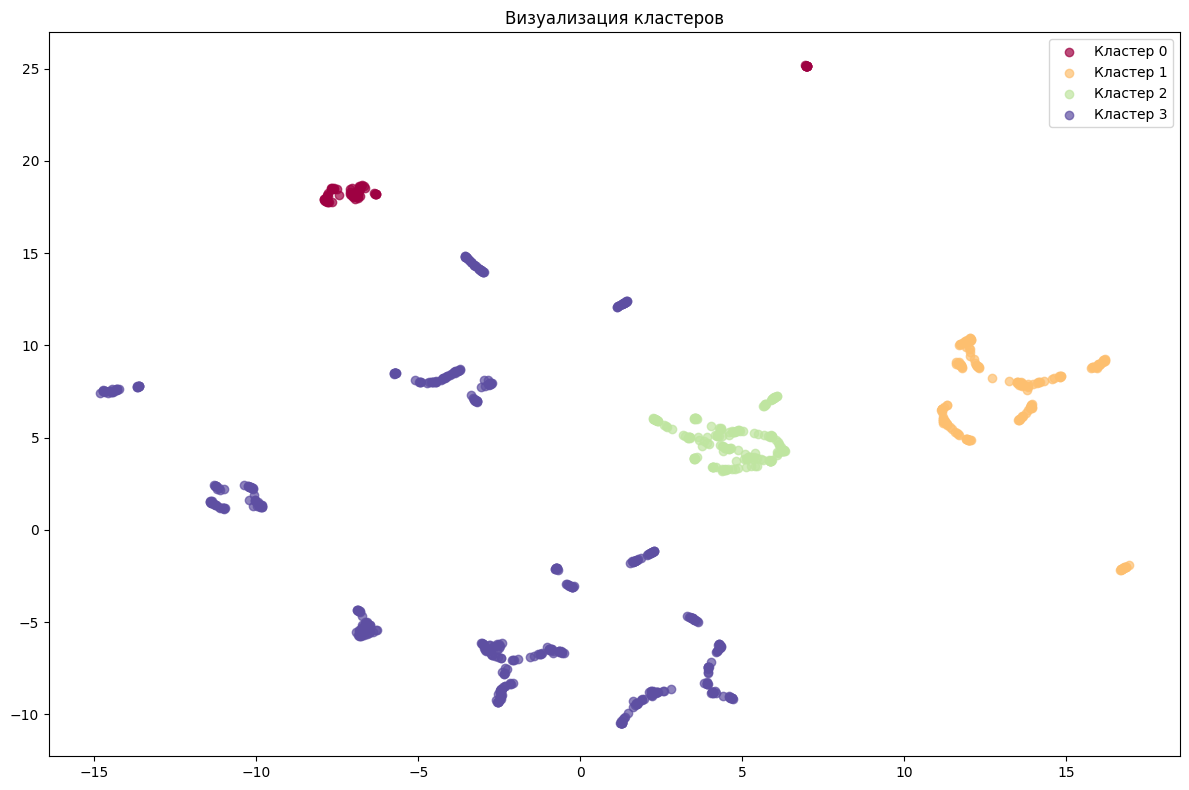


Анализ кластеров:

Кластер 0:
Общее описание: барнаул + ios
Размер кластера: 72

Характеристики:
- Возраст: 42.72 ± 16.90
- Доход: 92134.52 ± 38179.24
- Сумма покупки: 73593.66 ± 42051.09
- Частота покупок: 10.18 ± 6.15
- Кредитный рейтинг: 615.35 ± 148.88
- Отмененные заказы: 4.68 ± 3.53
- Количество жалоб: 2.49 ± 1.72
- Ключевые слова: барнаул, ios, linux, сургут, самара

Кластер 1:
Общее описание: товар + омск
Размер кластера: 192

Характеристики:
- Возраст: 42.41 ± 15.86
- Доход: 81094.80 ± 36213.48
- Сумма покупки: 74637.77 ± 43589.21
- Частота покупок: 9.51 ± 5.55
- Кредитный рейтинг: 580.70 ± 160.26
- Отмененные заказы: 4.97 ± 3.20
- Количество жалоб: 2.57 ± 1.75
- Ключевые слова: товар, омск, бытовой, игрушка, чебоксары, самара

Кластер 2:
Общее описание: тольятти + мебель
Размер кластера: 183

Характеристики:
- Возраст: 44.13 ± 16.65
- Доход: 83462.66 ± 36333.66
- Сумма покупки: 82187.55 ± 43233.61
- Частота покупок: 10.16 ± 5.60
- Кредитный рейтинг: 569.62 ± 156.24
- Отменен

In [77]:

use_tonal=False #принимается от пользователя

clusterer = MixedDataClusterer(vector_size=200, min_cluster_size=min_cluster_size(cust.shape[0],"linear"))

if use_tonal:
  cust=deep_learn_analizer(cust)

labels, descriptions = clusterer.fit_predict(cust)


print("\nРезультаты кластеризации:")
for label, desc in descriptions.items():
    if label == -1:
        print(f"\nШумовые точки:")
    else:
        print(f"\nКластер {label}:")
    print(f"Описание: {desc}")
    print(f"Количество элементов: {sum(labels == label)}")

cust['cluster'] = labels

In [24]:
cust

,Пол,Возраст,Город,Доход,Любимый продукт,Сумма покупки,Частота покупок,Семейное положение,Есть дети,Кредитный рейтинг,Отмененные заказы,Частота посещений магазина,Количество жалоб,Предпочитаемый способ доставки,Операционная система,cluster
0,Мужской,20,Белгород,115413.94,Садовые принадлежности,76994.78,6,не замужем,Нет,493,2,Еженедельно,1,Курьерская доставка,MacOS,5
1,Мужской,68,Волгоград,128148.01,Игрушки,111404.51,12,не замужем,Да,375,7,Редко,2,Самовывоз,Windows,0
2,Женский,47,Брянск,35106.46,Спортивные товары,104199.62,3,не замужем,Нет,446,6,Еженедельно,2,Самовывоз,MacOS,5
3,Женский,16,Ставрополь,65054.06,Ювелирные изделия,2221.82,9,не замужем,Нет,593,6,Еженедельно,3,Самовывоз,iOS,5
4,Мужской,49,Иркутск,137337.45,Автозапчасти,68821.98,7,не замужем,Нет,597,1,Еженедельно,0,Доставка на дом,Windows,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Мужской,22,Тюмень,31460.23,Автозапчасти,131125.07,19,не замужем,Нет,623,2,Еженедельно,4,Курьерская доставка,Windows,0
496,Женский,62,Красноярск,37035.09,Ювелирные изделия,132276.30,4,не замужем,Нет,830,10,Ежемесячно,5,Самовывоз,Linux,4
497,Мужской,31,Барнаул,30217.44,Музыка,41692.25,12,В браке,Нет,638,5,Редко,1,Курьерская доставка,iOS,2
498,Мужской,52,Ярославль,46321.63,Мебель,136097.89,2,В браке,Да,563,9,Редко,5,Доставка на дом,Android,2


# Облако слов

In [31]:


def combine_column(df, new_column_name="Combined", new_column_name2="Combined2"):
    df_new = pd.DataFrame()

    df_new[new_column_name] = df.apply(
        lambda row: ', '.join(row.astype(str).str.capitalize()), axis=1
    )

    return df_new

def clean_text(sentence):
    """
    Очищает текст от цифр и всех знаков препинания, кроме запятых.
    """
    return re.sub(r'[^\w\s,]', '', re.sub(r'\d+', '', sentence))
def uniform_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "green"


In [63]:
def word_cloud(df):
    """
    Генерирует облака слов для каждого кластера с автоматическим определением параметров.
    """
    df_new = combine_column(df)
    df_new["cluster"] = df["cluster"]
    df_new["word"] = df_new["Combined"].apply(clean_text)

    df_new['Word'] = df_new['word'].apply(lambda x: x.split(', '))

    for cluster, group in df_new.groupby('cluster'):
        if cluster>=0:
            used_words = set()
            word_counts = Counter()
            total_rows = len(group)

            for words in group['Word']:
                unique_words = set(words)
                word_counts.update(unique_words)

            if total_rows >= 100:
                percentage_threshold = 0.9
            elif total_rows >= 70:
                percentage_threshold = 0.8
            elif total_rows>=40:
                percentage_threshold = 0.5
            elif total_rows>=10:
                percentage_threshold = 0.2
            else :
                percentage_threshold = 0

            frequent_words = {
                word: count for word, count in word_counts.items()
                if count / total_rows >= percentage_threshold and word not in used_words
            }

            if len(frequent_words) < 2:

                frequent_words = dict(word_counts.most_common(2))

            if len(frequent_words) < 2:
                continue

            if frequent_words:
                wordcloud = WordCloud(width=800, height=400, background_color='whitesmoke',color_func=uniform_color_func,
                          colormap='tab10', relative_scaling=0).generate_from_frequencies(frequent_words)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation="bilinear")
                plt.axis("off")
                plt.title(f"Word Cloud for Cluster {cluster}")
                plt.show()


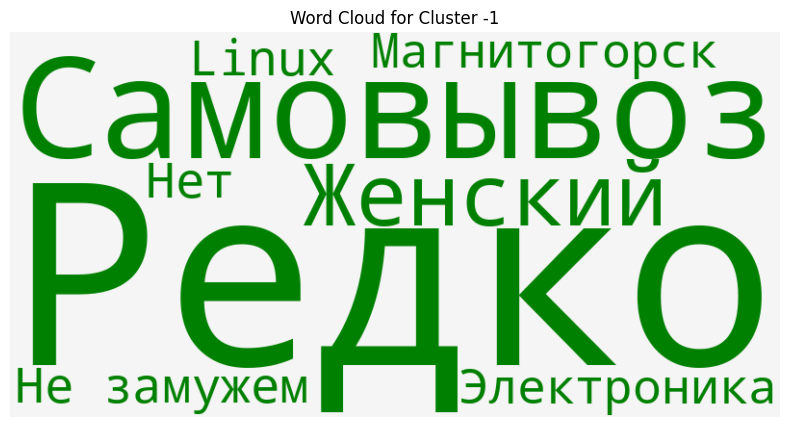

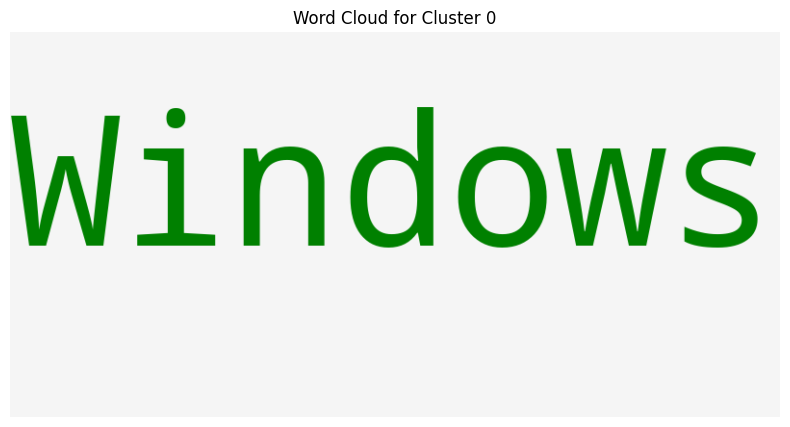

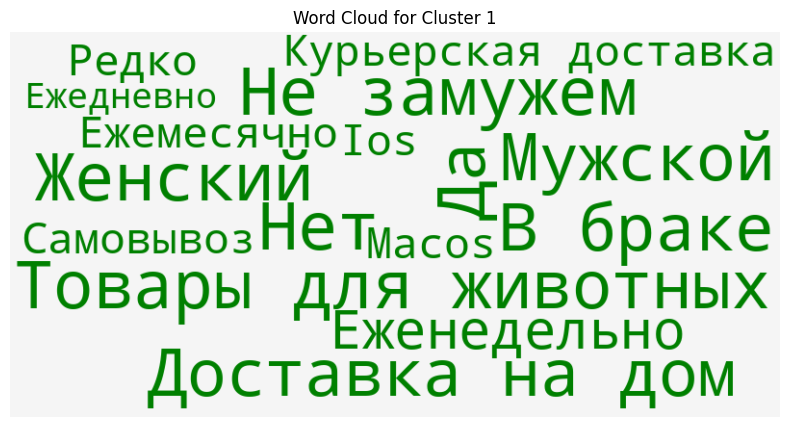

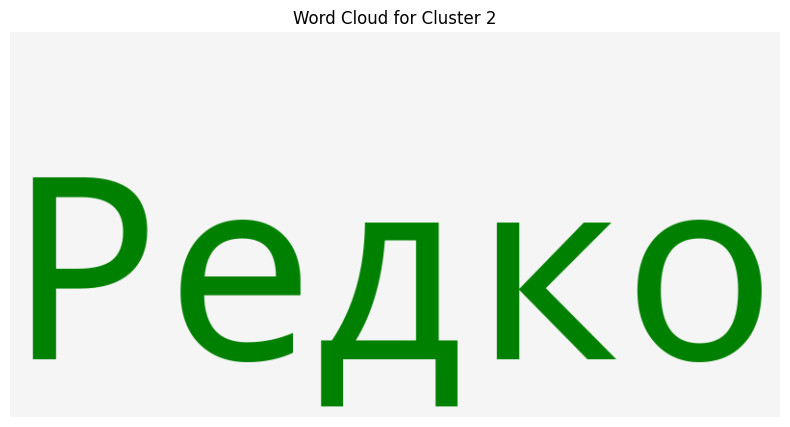

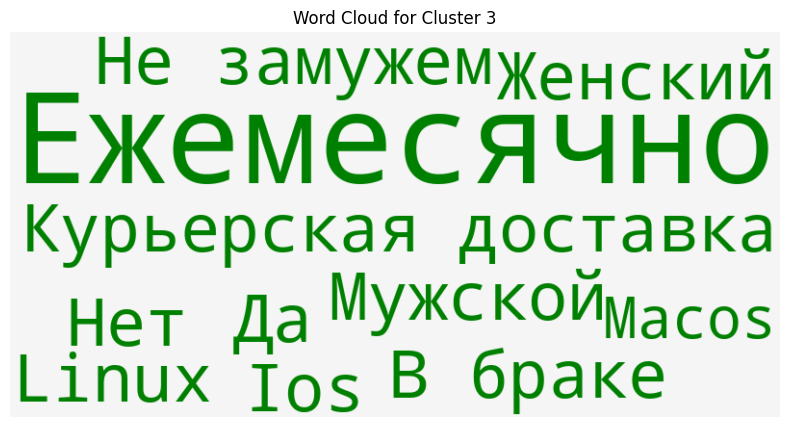

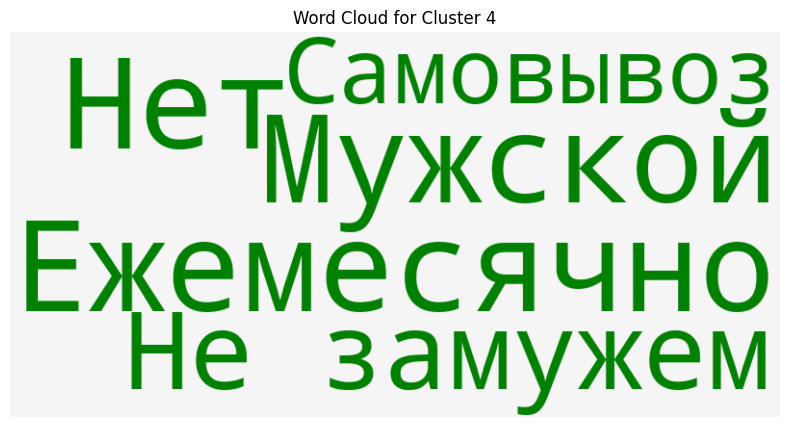

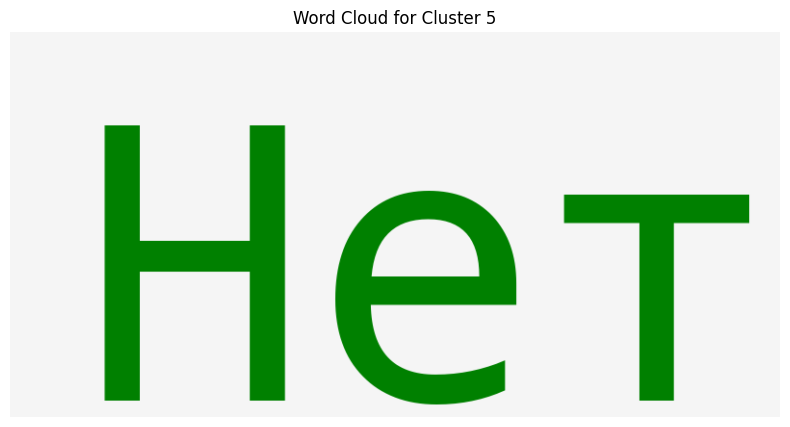

In [64]:
word_cloud(cust)
